# ** Full model redo: intron overalpping ** 

In [1]:
from numpy.random import choice
import copy 
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import time
import timeit
import numpy as np 
import json 

In [2]:
def base_to_mutate(DNA, current_weights, indices): 
    """
    (DNA: str, weights: Dict) -> int
    
    Will return the index of a random choice of a base that will be mutated based on probabilities given by the
    weights dictionary (i.e. the model)
    ex. "ATCGTA" --> index 3 ("G") will mutate
    """

    # NORMALIZE THE POPULATION OF WEIGHTS    
    total_freq = sum(current_weights) - current_weights[0] - current_weights[-1] # remove the start and end weight
    normalized_weights = ["error"]*len(current_weights)
    for index, value in enumerate(current_weights):
        normalized_weights[index] = value/total_freq 
    
    normalized_weights[0] = 0
    normalized_weights[-1] = 0
    # DRAW THE INDEX OF THE BASE THAT WILL BE MUTATED
    base_index = choice(indices, p=normalized_weights) 
    

    # RETURN THE INDEX
    return base_index  




In [ ]:
#informing the graph 
sim_details = ""

#making the dna ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dna_length = 100000
DNA  = choice(["A", "T", "C", "G"], size = dna_length)
DNA = "".join(DNA)
DNA_initial = copy.copy(DNA)
sim_details += str(dna_length/1000000) + "MB random seq \n "

#triplets
triplets = []
for i_1 in ["A", "T", "G", "C"]: 
    for i_2 in ["A", "T", "G", "C"]: 
        for i_3 in ["A", "T", "G", "C"]: 
            triplets.append(i_1+i_2+i_3)
        
#mutability model 
model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))
#triplet-count dict 
triplet_chosen_count_dict = {}
triplet_into_count_dict = {}
for triplet in triplets: 
    triplet_chosen_count_dict[triplet] = [0,0,0]  
    triplet_into_count_dict[triplet] = [0,0,0]

#making the weights 
current_weights = []
for i in range(1,len(DNA)-1): 
    triplet = DNA[i-1:i+2]
    current_weights.append(model[triplet][0])

indices = [i for i in range(1, len(DNA)-1)]
mut_indices = []

#choosing number of muts 
prop_muts = 0.1
sim_details += str(prop_muts)+"X prop muts \n"


# DESCRIBE THE SIMULATION PLEASE GOD ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!!!!!!!!!
sim_details = "random onto triplet,  overlapping" + sim_details

#runnign the sim ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for i in tqdm(range(int(len(DNA)*prop_muts))):
#     s0 = time.time()
    base_index = base_to_mutate(DNA, current_weights, indices)
    
#     s1 = time.time()
#     t1 = time.time() - s0
    
#     curr_index = indices.index(base_index)
#     current_weights = current_weights[0:curr_index -2]+current_weights[curr_index+3:]
    
    mut_indices.append(base_index)
#     s2 = time.time()
#     t2 = time.time() - s1
    #adding the count for "chosen to mutate" in coutns dict 
    c_triplet = DNA[base_index-1: base_index+2]
    c_triplet_left = DNA[base_index-2: base_index+1]
    c_triplet_right = DNA[base_index: base_index+3]
#     s3 = time.time()
#     t3 = time.time() - s2
    
    triplet_chosen_count_dict[c_triplet_left][0] += 1
    triplet_chosen_count_dict[c_triplet][1] += 1
    triplet_chosen_count_dict[c_triplet_right][2] += 1
#     s4 = time.time()
#     t4 = time.time() - s3

    curr_into_bases = ["A", "T", "C", "G"]
    curr_into_bases.remove(c_triplet[1])
    mb =  choice(curr_into_bases)
#     s5 = time.time()
#     t5 = time.time() - s4
    
    #adding the count for "mutated into thiss" in the triplet dict 
    m_triplet = c_triplet[0]+mb+c_triplet[2]
    m_triplet_left = c_triplet_left[0:2]+mb
    m_triplet_right = mb+c_triplet_right[1:3]
    
    triplet_into_count_dict[m_triplet_left][0] += 1 
    triplet_into_count_dict[m_triplet][1] += 1 
    triplet_into_count_dict[m_triplet_right][2] += 1 
#     s6 = time.time()
#     t6 = time.time() - s5
    
    #chanaging the dna 
    DNA = DNA[:base_index]+mb+DNA[base_index+1:]
#     s7 = time.time()
#     t7 = time.time() - s6

    current_weights[base_index-2]= model[m_triplet_left][0]    
    current_weights[base_index-1]= model[m_triplet][0]
    current_weights[base_index] = model[m_triplet_right][0]
    
# #troubleshooting~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# if len(mut_indices) != len(set(mut_indices)): 
#     print("duplicates in mutation indeices selected")
    
# mut_indices_sorted = copy.copy(mut_indices)
# mut_indices_sorted.sort()
# fuckups = []
# for index, value in enumerate(mut_indices_sorted): 
#     if index != 0: 
#         diff = value - mut_indices_sorted[index-1]
#         if diff < 3: 
#             first_ind = mut_indices.index(value)
#             second_ind = mut_indices.index(mut_indices_sorted[index-1])
#             fuckups.append([value, first_ind, mut_indices_sorted[index-1], second_ind])
# if len(fuckups) != 0: 
#     print(str(len(fuckups))+" mutations are closer than 3bp together")


  1%|          | 98/10000 [00:02<04:03, 40.61it/s]

## ** plotting ** 

In [5]:
triplet_chosen_left = []
triplet_chosen_centre = []
triplet_chosen_right = []
triplet_chosen_mean = []
triplet_into_left = []
triplet_into_centre = []
triplet_into_right = []
triplet_into_mean = []

muts = []
for triplet in triplets: 
    triplet_chosen_left.append(triplet_chosen_count_dict[triplet][0])
    triplet_chosen_centre.append(triplet_chosen_count_dict[triplet][1])
    triplet_chosen_right.append(triplet_chosen_count_dict[triplet][2])
    triplet_chosen_mean.append(np.mean(triplet_chosen_count_dict[triplet]))
    
    triplet_into_left.append(triplet_into_count_dict[triplet][0])
    triplet_into_centre.append(triplet_into_count_dict[triplet][1])
    triplet_into_right.append(triplet_into_count_dict[triplet][2])
    triplet_into_mean.append(np.mean(triplet_into_count_dict[triplet]))
    
    muts.append(model[triplet][0])

In [6]:
#plt.style.use("classic")
plt.style.use("seaborn-ticks")

** central ** 

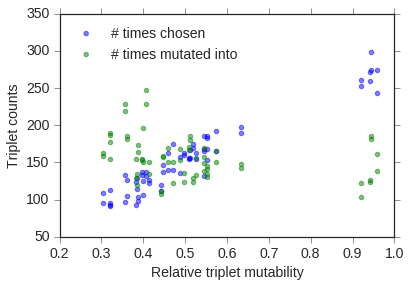

In [9]:
plt.scatter(muts,triplet_chosen_centre, color = "blue", label = "# times chosen", alpha = 0.5)
plt.scatter(muts,triplet_into_centre, color = "green", label = "# times mutated into", alpha = 0.5)
plt.legend(loc = 2)
plt.xlabel("Relative triplet mutability")
plt.ylabel("Triplet counts")
# sim_details = "1MB random string   0.05x prop muts \n new adj count: centre"
# plt.title(sim_details)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

#font size 

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}propmuts_rnadomINTO.png".format(p = prop_muts, l = str(dna_length/1000000), t = timestamp))

**left**

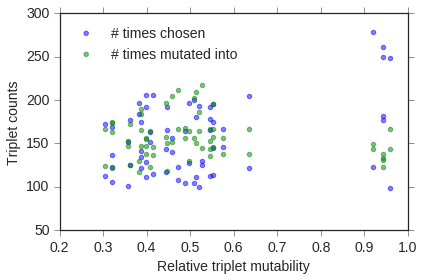

In [11]:
plt.style.use("seaborn-ticks")
plt.scatter(muts,triplet_chosen_left, color = "blue", label = "# times chosen", alpha = 0.5)
plt.scatter(muts,triplet_into_left, color = "green", label = "# times mutated into", alpha = 0.5)
plt.legend(loc = 2)
plt.xlabel("Relative triplet mutability")
plt.ylabel("Triplet counts")
# sim_details = " 1MB random string   0.05x prop muts \n new adj count: left"
# plt.title(sim_details)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

#font size 
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

# plt.show()
timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
plt.tight_layout()
plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}propmuts_rnadomINTO_left.png".format(p = prop_muts, l = str(dna_length/1000000),t = timestamp))

In [38]:
len(triplet_into_right,)

64

** right ** 

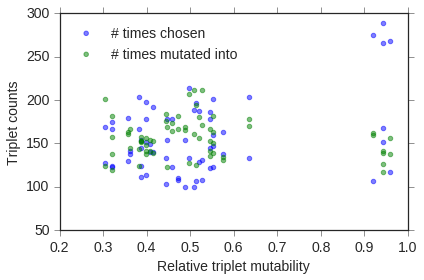

In [12]:
plt.scatter(muts,triplet_chosen_right, color = "blue", label = "# times chosen", alpha = 0.5)
plt.scatter(muts,triplet_into_right, color = "green", label = "# times mutated into", alpha = 0.5)
plt.legend(loc = 2)
plt.xlabel("Relative triplet mutability")
plt.ylabel("Triplet counts")
# sim_details = " 1MB random string   0.05x prop muts \n new adj count: left"
# plt.title(sim_details)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

#font size 
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}propmuts_rnadomINTO_right.png".format(p = prop_muts, l = str(dna_length/1000000),t = timestamp))

** mean of all three** 

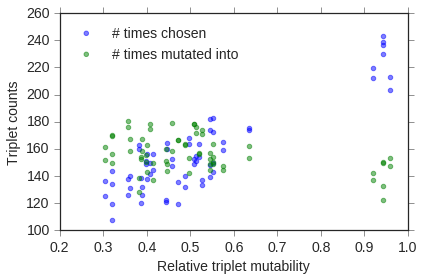

In [13]:
plt.scatter(muts,triplet_chosen_mean, color = "blue", label = "# times chosen", alpha = 0.5)
plt.scatter(muts,triplet_into_mean, color = "green", label = "# times mutated into", alpha = 0.5)
plt.legend(loc = 2)
plt.xlabel("Relative triplet mutability")
plt.ylabel("Triplet counts")
# sim_details = " 1MB random string   0.05x prop muts \n new adj count: left"
# plt.title(sim_details)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

#font size 
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}propmuts_rnadomINTO_meanAll3.png".format(p = prop_muts, l = str(dna_length/1000000),t = timestamp))

 # ** TRIPLET COUNT CHNAGE PLOT ** 

In [14]:
trip_count_dict_init_final = {}

for triplet in triplets: 
    trip_count_dict_init_final[triplet] = [0,0]
    
for index in tqdm(range(1,len(DNA_initial)-1)): 
    triplet = DNA_initial[index-1:index+2]
    trip_count_dict_init_final[triplet][0] += 1
    
    triplet = DNA[index-1:index+2]
    trip_count_dict_init_final[triplet][1] += 1

triplet_change = []
for triplet in triplets: 
    triplet_change.append(trip_count_dict_init_final[triplet][1]- trip_count_dict_init_final[triplet][0])
    
    

100%|██████████| 99998/99998 [00:00<00:00, 730337.74it/s]


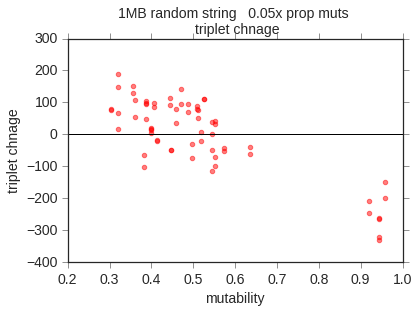

In [15]:
plt.scatter(muts,triplet_change, color = "red", label = "# times chosen", alpha = 0.5)
plt.xlabel("mutability")
plt.ylabel("triplet chnage")
sim_details = "1MB random string   0.05x prop muts \n triplet chnage"
plt.title(sim_details)

plt.hlines(0, xmin = 0.2, xmax = 1)
plt.xlim((0.2,1))

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Data/Scatter_{t}_{p}propmuts.png".format(p = prop_muts, t = timestamp))

# **appendix **

** understanding the sim: differences b/t muts ** 

In [95]:
mut_indices.sort()
mut_chosen_differences = []
for index,value in enumerate(mut_indices): 
    if index != 0: 
        mut_chosen_differences.append( value - mut_indices[index-1])
    

In [24]:
2+2

4

(array([  3.28190000e+04,   1.12410000e+04,   3.93600000e+03,
          1.30200000e+03,   4.68000000e+02,   1.35000000e+02,
          6.50000000e+01,   2.00000000e+01,   9.00000000e+00,
          4.00000000e+00]),
 array([   0. ,   21.4,   42.8,   64.2,   85.6,  107. ,  128.4,  149.8,
         171.2,  192.6,  214. ]),
 <a list of 10 Patch objects>)

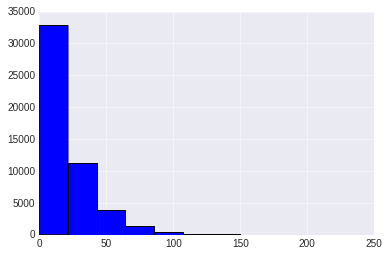

In [109]:
plt.hist(mut_chosen_differences)

In [49]:
for gen in tqdm(range(int(len(DNA)/10))): 
    base_index = base_to_mutate(DNA, current_weights, indices, mut_indices)
    #     print(mut_indices)
    #     print(base_index)
    indices = indices[0:base_index -2]+indices[base_index+3:]
    current_weights = current_weights[0:base_index -2]+current_weights[base_index+3:]
    mut_indices.append(base_index)


100%|██████████| 3/3 [00:00<00:00, 3345.63it/s]


In [51]:
mut_indices

[9, 3, 15]

In [50]:
indices


[1, 7, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [127]:

for i in tqdm(range(int(len(DNA)/10))):
    base_index = base_to_mutate(DNA, current_weights, indices, mut_indices)
    
    curr_index = indices.index(base_index)
    indices = indices[0:curr_index -3]+indices[curr_index+4:]
    current_weights = current_weights[0:curr_index -3]+current_weights[curr_index+4:]

    c_triplet = DNA[base_index-1: base_index+2]

    curr_into_bases = ["A", "T", "C", "G"]
    curr_into_bases.remove(c_triplet[1])
    mb =  choice(curr_into_bases)

    DNA = DNA[:base_index]+mb+DNA[base_index+1:]
    #print(base_index, indices, mb, sep = "\t")

100%|██████████| 1100/1100 [00:04<00:00, 225.03it/s]


In [146]:
len(mut_indices)

1100

In [130]:
len(set(mut_indices))

1100

In [134]:
mut_indices.sort()

In [140]:
fuckups = []
for index, value in enumerate(mut_indices): 
    if index != 0: 
        diff = value - mut_indices[index-1]
        if diff <= 3: 
            fuckups.append([value, mut_indices[index-1]])


In [149]:
fuckups[0:10]

[[463, 461],
 [945, 942],
 [968, 965],
 [1491, 1489],
 [1755, 1754],
 [2113, 2111],
 [2142, 2139],
 [2255, 2253],
 [2652, 2649],
 [2729, 2726]]

In [161]:
DNA = "ATGTGTAGTCT"*1000
current_weights = [choice([0.35, 0.1, 0.5, 0.21]) for x in range(1,len(DNA)-1)]
indices = [i for i in range(1, len(DNA)-1)]
mut_indices = []


In [49]:
into_triplets = []
into_weights = []
for into_triplet, into_weight in model[triplet][1].items(): 
    into_triplets.append(into_triplet)
    into_weights.append(into_weight)

into_weight_sum = sum(into_weights) 
for index, value in enumerate(into_weights): 
    into_weights[index] = value/into_weight_sum

mTriplet = choice(into_triplets, p = into_weights)
    
print(into_triplets, into_weights)

CTC
['CGC', 'CAC', 'CTC'] [0.2352525609325327, 0.11974567290709998, 0.6450017661603674]


In [66]:

    #print(base_index, indices,  sep = "\t")

100%|██████████| 10000/10000 [03:35<00:00, 46.49it/s]


10000

10000

In [145]:
461 in mut_indices

True

In [133]:
len(set(("hello", "goodbye", "hello")))

2

In [101]:
print(DNA, base_index, mb, sep = "\t")

ATGTGTAGTAT	9	A


In [103]:
print(DNA, base_index, mb, sep = "\t")

ATGTGTAGCAT	8	C


** old base to mutate before tried to do the optimization ** 

In [2]:
def base_to_mutate(DNA, current_weights, indices): 
    """
    (DNA: str, weights: Dict) -> int
    
    Will return the index of a random choice of a base that will be mutated based on probabilities given by the
    weights dictionary (i.e. the model)
    ex. "ATCGTA" --> index 3 ("G") will mutate
    """

    # NORMALIZE THE POPULATION OF WEIGHTS    
    total_freq = sum(current_weights) 
    normalized_weights = copy.copy(current_weights)
    for index, value in enumerate(current_weights):
        normalized_weights[index] = value/total_freq 

    # DRAW THE INDEX OF THE BASE THAT WILL BE MUTATED
    base_index = choice(indices, p=normalized_weights) 
        
    
    # RETURN THE INDEX
    return base_index



In [79]:
# NORMALIZE THE POPULATION OF WEIGHTS    
s0 = time.time ()
total_freq = sum(current_weights) 
s1 = time.time()
t1 = time.time() - s0

normalized_weights = ["error"]*len(current_weights)
s2 = time.time()
t2 = time.time() - s1

for index, value in enumerate(current_weights):
    normalized_weights[index] = value/total_freq 
s3 = time.time()
t3 = time.time() - s2

# DRAW THE INDEX OF THE BASE THAT WILL BE MUTATED
base_index = choice(indices, p=normalized_weights) 
s4 = time.time()
t4 = time.time() - s3


In [80]:
print(t1,t2,t3,t4)

0.005890607833862305 0.012868881225585938 0.1864941120147705 0.11419153213500977
